<a href="https://colab.research.google.com/github/Viny2030/colabs/blob/main/intropolars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Qué es Polars?


Polars es una librería diseñada para trabajar con datos tabulares (DataFrames). Tiene como principal característica la capacidad de procesar grandes volúmenes de datos de forma rápida y eficiente, gracias a que maximiza el uso de todos los cores disponibles en un ordenador. Su mayor capacidad para procesar datos frente a otras librerías, por ejemplo Pandas, se debe a que está desarrollada en Rust, lo que le permite disponer de la paralelización de tareas desde su raíz. Además, utiliza Arrow arrays, una estructura de datos especialmente optimizada para realizar operaciones columnares. Actualmente, Polars dispone de APIs en Python y Rust.

Es una librería que ha ganando mucha popularidad a lo largo de los últimos años y puede ser buena alternativa frente a otros frameworks de procesamiento de datos en Python.

En este artículo se utiliza la API de Python y tiene como objetivo hacer una pequeña introducción a la sintaxis de Polars y algunas de sus principales funcionalidades.








In [1]:
# Librerías
# ======================================================================================
import polars as pl
from datetime import datetime

# Datos
En este artículo de introducción, vamos a utilizar datos públicos del sistema nacional de salud de Inglaterra (NHS: National Health Service). El archivo de tipo csv contiene una muestra de datos de prescripciones médicas realizadas en Reino Unido (Deciembre 2014) y pueden descargarse desde el siguiente link. En este enlace se puede obtener más información sobre este dataset: link

Polars puede trabajar con distintos formatos de datos (csv, parquet, json, DBs, etc.).

In [16]:
# Lectura de datos (csv)
# ==============================================================================
url = (
    "https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/Analisis_de_Facturas_de_Venta.csv"
)
df = pl.read_csv(url)



In [17]:
print(f"Tipo de objeto: {type(df)}")
print(f"Dimensiones de los datos: {df.shape}")
display(df.head())

Tipo de objeto: <class 'polars.dataframe.frame.DataFrame'>
Dimensiones de los datos: (159, 9)


DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
str,str,str,str,str,f64,f64,f64,str
"""B-0001-00000102""","""Etigand S.A.""","""27/12/19""","""Factura""","""Consultoria Web""",50.0,5785.124,289256.2,"""Pesos Argentinos"""
"""B-0001-00000101""","""Javier Moroni""","""21/12/19""","""Factura""","""Honorarios""",1.0,99586.7769,99586.78,"""Pesos Argentinos"""
"""A-0001-00000231""","""Amazon Group""","""10/12/19""","""Factura""","""Parlantes para PC""",30.0,1990.0,59700.0,"""Pesos Argentinos"""
"""A-0001-00000230""","""Amazon Group""","""6/12/19""","""Factura""","""Mercaderia de Reventa""",30.0,10358.0,310740.0,"""Pesos Argentinos"""
"""A-0001-00000229""","""Manganello S.R.L""","""20/11/19""","""Factura""","""Consultoria Web""",50.0,6300.0,315000.0,"""Pesos Argentinos"""


In [18]:
df.head(3)

DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
str,str,str,str,str,f64,f64,f64,str
"""B-0001-00000102""","""Etigand S.A.""","""27/12/19""","""Factura""","""Consultoria Web""",50.0,5785.124,289256.2,"""Pesos Argentinos"""
"""B-0001-00000101""","""Javier Moroni""","""21/12/19""","""Factura""","""Honorarios""",1.0,99586.7769,99586.78,"""Pesos Argentinos"""
"""A-0001-00000231""","""Amazon Group""","""10/12/19""","""Factura""","""Parlantes para PC""",30.0,1990.0,59700.0,"""Pesos Argentinos"""


In [19]:
df.describe()

statistic,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
str,str,str,str,str,str,f64,f64,f64,str
"""count""","""159""","""159""","""159""","""159""","""159""",159.0,159.0,159.0,"""159"""
"""null_count""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,"""0"""
"""mean""",null,null,null,null,null,7.383648,24021.195378,58406.882767,null
"""std""",null,null,null,null,null,11.455914,30051.944155,73240.58178,null
"""min""","""A-0001-00000128""","""Amazon Group""","""1/1/18""","""Factura""","""Cable RGB para video""",1.0,107.438,123.97,"""Dólares"""
"""25%""",null,null,null,null,null,1.0,3500.0,14950.0,null
"""50%""",null,null,null,null,null,1.0,12000.0,31404.96,null
"""75%""",null,null,null,null,null,10.0,32999.0,73140.5,null
"""max""","""B-0001-00000102""","""Valeria Welponer""","""9/9/18""","""Factura""","""Televisor Led Samsung 32 Hd C…",60.0,165980.0,370620.0,"""Pesos Argentinos"""


##La primera cosa que podemos notar es que, la función de lectura csv, es muy similar a la syntax de Pandas .read_csv() y que también nos permite pasar argumentos como sep, columns, skip_rows, etc (API Doc)
##El objeto devuelto es de tipo polars.internals.dataframe.frame.DataFrame, contiene 50000 filas y 26 columnas.
Al igual que en Pandas, los polars.DataFrame tiene atributos capaces de informarnos del shape, schema, columns y dtypes. (API Doc)
##Los polars.DataFrame también poseen atributos y métodos que permiten explorar y visualizar los datos de forma rápida. En el código anterior hemos llamado al método .head() que devuelve por defecto las 5 primeras líneas del DataFrame. Otros métodos para una rápida exploración son .tail() y .sample().
##Es interesante destacar que, cuando hacemos un display del DataFrame, se muestra debajo del nombre de cada columna el tipo de datos.
A diferencia de los DataFrame de Pandas,los polars.DataFrame no tiene un index asociado a las filas.

## atributos de un dtaaframe de polars

In [20]:
n_chars = 50

# df.columns
# ==============================================================================
print("="*n_chars)
print("df.columns: listado de columnas de un DataFrame")
print(df.columns)
print("")

# df.types
# ==============================================================================
print("="*n_chars)
print("df.types: tipos de datos de las columnas de un DataFrame")
print(df.dtypes)
print(f"Tipos de datos únicos: {set(df.dtypes)}")
print("")

# df.schema
# ==============================================================================
print("="*n_chars)
print("df.schema: Diccionario con las columnas y sus tipos de datos")
print(df.schema)
print("")

# df.shape
# ==============================================================================
print("="*n_chars)
print("df.shape : filas x columnas de un DataFrame")
print(df.shape)
print("")

# df.height
# ==============================================================================
print("="*n_chars)
print("df.height : número de filas de un DataFrame")
print(df.height)
print("")

# df.width
# ==============================================================================
print("="*n_chars)
print("df.width : número de columnas de un DataFrame")
print(df.width)
print("")

df.columns: listado de columnas de un DataFrame
['DOCUMENTO', 'ORGANIZACION', 'FECHA', 'TIPOFACTURA', 'PRODUCTO', 'CANTIDAD', 'PRECIO', 'IMPORTEMONTRANSACCION', 'MONEDA']

df.types: tipos de datos de las columnas de un DataFrame
[String, String, String, String, String, Float64, Float64, Float64, String]
Tipos de datos únicos: {String, Float64}

df.schema: Diccionario con las columnas y sus tipos de datos
Schema([('DOCUMENTO', String), ('ORGANIZACION', String), ('FECHA', String), ('TIPOFACTURA', String), ('PRODUCTO', String), ('CANTIDAD', Float64), ('PRECIO', Float64), ('IMPORTEMONTRANSACCION', Float64), ('MONEDA', String)])

df.shape : filas x columnas de un DataFrame
(159, 9)

df.height : número de filas de un DataFrame
159

df.width : número de columnas de un DataFrame
9



Cómo podemos observar, Polars ha inferido tres tipos de datos distintos para nuestro dataset:

Float64: Numeric (64-bit floating point type)

Int64: Numeric (64-bit signed integer type)

Utf8: String (UTF-8 encoded string type)

Más información sobre los tipos de datos disponibles en Polars aquí

`Métricas y valores descriptivos`
Los polars.DataFrame tienen distintos métodos capaces de generar métricas descriptivas de los datos. Entre ellos destaca .describe() que nos devuelve los principales estadísticos descriptivos de cada columna. Por defecto, las métricas numéricas como mean, std, etc no están disponibles para las columnas de tipo string.

In [22]:
# df.describe()
# ==============================================================================
print("df.describe(): Summary Stats")
display(df.describe())

df.describe(): Summary Stats


statistic,DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
str,str,str,str,str,str,f64,f64,f64,str
"""count""","""159""","""159""","""159""","""159""","""159""",159.0,159.0,159.0,"""159"""
"""null_count""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,"""0"""
"""mean""",null,null,null,null,null,7.383648,24021.195378,58406.882767,null
"""std""",null,null,null,null,null,11.455914,30051.944155,73240.58178,null
"""min""","""A-0001-00000128""","""Amazon Group""","""1/1/18""","""Factura""","""Cable RGB para video""",1.0,107.438,123.97,"""Dólares"""
"""25%""",null,null,null,null,null,1.0,3500.0,14950.0,null
"""50%""",null,null,null,null,null,1.0,12000.0,31404.96,null
"""75%""",null,null,null,null,null,10.0,32999.0,73140.5,null
"""max""","""B-0001-00000102""","""Valeria Welponer""","""9/9/18""","""Factura""","""Televisor Led Samsung 32 Hd C…",60.0,165980.0,370620.0,"""Pesos Argentinos"""


# Valores Nulos
El método .null_count() devuelve un DataFrame con el total de valores nulos por columna. Más adelante en este artículo, también vamos a ver cómo encontrar y manipular estos valores.

In [23]:
# df.null_count()
# ==============================================================================
print("df.null_count(): Devuelve un DataFrame con el total de valores nulos por columna")
display(df.null_count())

df.null_count(): Devuelve un DataFrame con el total de valores nulos por columna


DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


In [25]:
type(df)

polars.dataframe.frame.DataFrame

In [26]:
df.head(3)

DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
str,str,str,str,str,f64,f64,f64,str
"""B-0001-00000102""","""Etigand S.A.""","""27/12/19""","""Factura""","""Consultoria Web""",50.0,5785.124,289256.2,"""Pesos Argentinos"""
"""B-0001-00000101""","""Javier Moroni""","""21/12/19""","""Factura""","""Honorarios""",1.0,99586.7769,99586.78,"""Pesos Argentinos"""
"""A-0001-00000231""","""Amazon Group""","""10/12/19""","""Factura""","""Parlantes para PC""",30.0,1990.0,59700.0,"""Pesos Argentinos"""


In [27]:
df.schema

Schema([('DOCUMENTO', String),
        ('ORGANIZACION', String),
        ('FECHA', String),
        ('TIPOFACTURA', String),
        ('PRODUCTO', String),
        ('CANTIDAD', Float64),
        ('PRECIO', Float64),
        ('IMPORTEMONTRANSACCION', Float64),
        ('MONEDA', String)])

# *Polars expressions*
Las Expressions son funciones/métodos utilizados a la hora de realizar operaciones con datos en Polars (e.g., selección, creación y manipulación de columnas, aplicación de filtros, entre otros). Tienen como entrada una serie y como salida otra serie, y són, por definición, un mapeo entre séries, lo que nos permite encadenarlas. Además, Polars es capaz de automatizar la ejecución de las expressions en paralelo siempre que sea posible (cuando se trabaja con múltiples columnas, por ejemplo) lo que hace de las Expressions algo muy potente.

# Selección de columnas
Vamos ahora ver un ejemplo de cómo seleccionar columna(s) utilizando a Polars Expressions:

In [28]:
# .select(): Método utilizado para seleccionar una o más columnas
# ==============================================================================
df.select(pl.col("ORGANIZACION"))

ORGANIZACION
str
"""Etigand S.A."""
"""Javier Moroni"""
"""Amazon Group"""
"""Amazon Group"""
"""Manganello S.R.L"""
…
"""Hernandez S.A."""
"""Etigand S.A."""
"""Etigand S.A."""


In [31]:
type(df.select(pl.col("ORGANIZACION")))

polars.dataframe.frame.DataFrame

`Cómo podemos observar en este ejemplo, hemos utilizado el método .select() para seleccionar una columna específica de nuestro DataFrame ("REGIONAL_OFFICE_NAME"). Por defecto, este método nos retorna un otro DataFrame (polars.internals.dataframe.frame.DataFrame)`

Para seleccionar columnas podemos pasar una lista con las columnas deseadas:

In [36]:
df.select(
    [
        pl.col("DOCUMENTO"),
        pl.col("ORGANIZACION"),
        pl.sum("IMPORTEMONTRANSACCION").alias("suma_importe"),
        pl.mean("IMPORTEMONTRANSACCION").alias("media_importe"),
    ]
)



DOCUMENTO,ORGANIZACION,suma_importe,media_importe
str,str,f64,f64
"""B-0001-00000102""","""Etigand S.A.""",9.2867e6,58406.882767
"""B-0001-00000101""","""Javier Moroni""",9.2867e6,58406.882767
"""A-0001-00000231""","""Amazon Group""",9.2867e6,58406.882767
"""A-0001-00000230""","""Amazon Group""",9.2867e6,58406.882767
"""A-0001-00000229""","""Manganello S.R.L""",9.2867e6,58406.882767
…,…,…,…
"""A-0001-00000128""","""Hernandez S.A.""",9.2867e6,58406.882767
"""B-0001-00000069""","""Etigand S.A.""",9.2867e6,58406.882767
"""B-0001-00000069""","""Etigand S.A.""",9.2867e6,58406.882767


`Para la selección de columnas, también se puede pasar un string o una lista de strings directamente al método .select() (ejemplo abajo). Sin embargo, en general, la utilización de la expression pl.col() para seleccionar columnas es más indicada ya que tiene la ventaja de permitir encadenar y paralelizar la ejecución de otras tareas.`

In [40]:
# Selección de una única columna
# ==============================================================================
display(df.select("ORGANIZACION").head())



ORGANIZACION
str
"""Etigand S.A."""
"""Javier Moroni"""
"""Amazon Group"""
"""Amazon Group"""
"""Manganello S.R.L"""


In [39]:

# Selección de múltiples columnas
# ==============================================================================
display(df.select(["ORGANIZACION","DOCUMENTO"]).head())

ORGANIZACION,DOCUMENTO
str,str
"""Etigand S.A.""","""B-0001-00000102"""
"""Javier Moroni""","""B-0001-00000101"""
"""Amazon Group""","""A-0001-00000231"""
"""Amazon Group""","""A-0001-00000230"""
"""Manganello S.R.L""","""A-0001-00000229"""


# **Creando una secuencia de tareas**
En esta sección vamos a entender de manera muy sencilla cómo podemos crear una secuencia de pasos para manipular nuestros datos.

Estos serán los pasos que vamos a implementar:

Seleccionar y renombrar columnas

Crear una nueva columna

Aplicar un filtro a una determinada columna

Realizar una ordenación

In [41]:
df.head(3)

DOCUMENTO,ORGANIZACION,FECHA,TIPOFACTURA,PRODUCTO,CANTIDAD,PRECIO,IMPORTEMONTRANSACCION,MONEDA
str,str,str,str,str,f64,f64,f64,str
"""B-0001-00000102""","""Etigand S.A.""","""27/12/19""","""Factura""","""Consultoria Web""",50.0,5785.124,289256.2,"""Pesos Argentinos"""
"""B-0001-00000101""","""Javier Moroni""","""21/12/19""","""Factura""","""Honorarios""",1.0,99586.7769,99586.78,"""Pesos Argentinos"""
"""A-0001-00000231""","""Amazon Group""","""10/12/19""","""Factura""","""Parlantes para PC""",30.0,1990.0,59700.0,"""Pesos Argentinos"""


In [42]:
# 1. Seleccionar y renombrar columnas: "REGIONAL_OFFICE_NAME", "AREA_TEAM_NAME", "BNF_DESCRIPTION", "TOTAL_QUANTITY", "NIC"
# ==============================================================================
processed_df = (
df.select(
        [
            pl.col("ORGANIZACION").alias("ORG_name"),
            pl.col("DOCUMENTO").alias("DOC_name"),
            pl.col("TIPOFACTURA").alias("TIP_name"),
            pl.col("PRECIO").alias("PRECIO_qt"),
            pl.col("IMPORTEMONTRANSACCION").alias("MONTO_cost"),
        ]
    )
)

processed_df.head()

ORG_name,DOC_name,TIP_name,PRECIO_qt,MONTO_cost
str,str,str,f64,f64
"""Etigand S.A.""","""B-0001-00000102""","""Factura""",5785.124,289256.2
"""Javier Moroni""","""B-0001-00000101""","""Factura""",99586.7769,99586.78
"""Amazon Group""","""A-0001-00000231""","""Factura""",1990.0,59700.0
"""Amazon Group""","""A-0001-00000230""","""Factura""",10358.0,310740.0
"""Manganello S.R.L""","""A-0001-00000229""","""Factura""",6300.0,315000.0


Cómo podemos ver, una manera de renombrar las columnas es a través de la expresión alias() que puede ser encadenada a cada una de las columnas dentro del select().

In [44]:
# 2. Creación de nuevas columnas: unit_cost, execution_date
# ==============================================================================
processed_df = (
    processed_df
    .with_columns([
        (pl.col("MONTO_cost")/pl.col("PRECIO_qt")).alias("unit_cost"),  # Use the renamed column "MONTO_cost"
        (pl.lit(datetime.now().date()).alias("execution_date")),
    ])
)

processed_df.head()

ORG_name,DOC_name,TIP_name,PRECIO_qt,MONTO_cost,unit_cost,execution_date
str,str,str,f64,f64,f64,date
"""Etigand S.A.""","""B-0001-00000102""","""Factura""",5785.124,289256.2,50.0,2024-11-16
"""Javier Moroni""","""B-0001-00000101""","""Factura""",99586.7769,99586.78,1.0,2024-11-16
"""Amazon Group""","""A-0001-00000231""","""Factura""",1990.0,59700.0,30.0,2024-11-16
"""Amazon Group""","""A-0001-00000230""","""Factura""",10358.0,310740.0,30.0,2024-11-16
"""Manganello S.R.L""","""A-0001-00000229""","""Factura""",6300.0,315000.0,50.0,2024-11-16


##Para crear columnas utilizamos la expresión with_columns() donde podemos crear varias columnas a la vez. pl.lit() se utiliza cuando queremos propagar una constante para todo el DataFrame. En este ejemplo hemos creado una fecha de ejecución que ha sido propagada en todo el DataFrame en la nueva columna execution_date que fue automáticamente inferida cómo tipo date por Polars.

In [45]:
# 3. Filtrar filas: region_name = 'LONDON' or  'SOUTH OF ENGLAND'
# ==============================================================================
processed_df = (
    processed_df
    .filter(
        (pl.col("ORG_name") == "Javier Moroni") | (pl.col("TIP_name") == "FACTURA")
    )
)

processed_df.head()

ORG_name,DOC_name,TIP_name,PRECIO_qt,MONTO_cost,unit_cost,execution_date
str,str,str,f64,f64,f64,date
"""Javier Moroni""","""B-0001-00000101""","""Factura""",99586.7769,99586.78,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000099""","""Factura""",6300.0,6300.0,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000098""","""Factura""",60633.4842,60633.48,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000094""","""Factura""",63800.905,63800.91,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000091""","""Factura""",560.0,26880.0,48.0,2024-11-16


In [47]:
# 4. Ordenar resultados: net_ingredient_cost desc
# ==============================================================================
processed_df = (
    processed_df
    .sort("MONTO_cost", descending=True)
)

processed_df.head()

ORG_name,DOC_name,TIP_name,PRECIO_qt,MONTO_cost,unit_cost,execution_date
str,str,str,f64,f64,f64,date
"""Javier Moroni""","""B-0001-00000101""","""Factura""",99586.7769,99586.78,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000094""","""Factura""",63800.905,63800.91,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000098""","""Factura""",60633.4842,60633.48,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000071""","""Factura""",53719.0083,53719.01,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000082""","""Factura""",37190.0826,37190.08,1.0,2024-11-16


# Para ordenar todo un DataFrame se utiliza la expresión .sort() que permite ordenar datos a partir de varias columnas de manera ascendente o descendente.

# La principal ventaja de trabajar con las Polars Expressions es poder concatenarlas dentro de un solo bloque de código. Abajo, vamos a crear una función de preprocesado para ejemplificar esta secuencia de tareas:

In [48]:
# Función de preprocesado
# ==============================================================================
def preprocess_raw_data(raw_data):

    df = (
        raw_data
        .select(
            [
            pl.col("ORGANIZACION").alias("ORG_name"),
            pl.col("DOCUMENTO").alias("DOC_name"),
            pl.col("TIPOFACTURA").alias("TIP_name"),
            pl.col("PRECIO").alias("PRECIO_qt"),
            pl.col("IMPORTEMONTRANSACCION").alias("MONTO_cost"),
            ]
        )
        .with_columns([
             (pl.col("MONTO_cost")/pl.col("PRECIO_qt")).alias("unit_cost"),  # Use the renamed column "MONTO_cost"
             (pl.lit(datetime.now().date()).alias("execution_date")),
        ])
        .filter(
             (pl.col("ORG_name") == "Javier Moroni") | (pl.col("TIP_name") == "FACTURA")
        )
        .sort("MONTO_cost", descending=True)
    )

    return df

nhs_processed_df = preprocess_raw_data(raw_data=df)

print(nhs_processed_df.shape)
display(nhs_processed_df.head())

(16, 7)


ORG_name,DOC_name,TIP_name,PRECIO_qt,MONTO_cost,unit_cost,execution_date
str,str,str,f64,f64,f64,date
"""Javier Moroni""","""B-0001-00000101""","""Factura""",99586.7769,99586.78,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000094""","""Factura""",63800.905,63800.91,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000098""","""Factura""",60633.4842,60633.48,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000071""","""Factura""",53719.0083,53719.01,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000082""","""Factura""",37190.0826,37190.08,1.0,2024-11-16


# **Lazy evaluation**
Hasta el momento, todo lo que hemos ejecutado en nuestro DataFrame (df:polars.DataFrame) se ejecutó en modo Eager, es decir, de manera instantánea de acuerdo con lo que hemos definido en las celdas, tal cómo ocurriría si fuera un DataFrame de Pandas.

`Sin embargo, Polars también tiene una forma Lazy para evaluar/ejecutar las instrucciones de código.`


 Esta forma Lazy permite a Polars evaluar la sintaxis de nuestro código/expresión, optimizarla y finalmente ejecutarla dentro de su engine. Esto permite, en general, mejorar aún más el rendimiento y optimizar el uso de la memoria. En modo Lazy, Polars crea y realiza un seguimiento de nuestro código en un plan lógico donde es capaz de optimizar y reordenar cada tarea antes de ejecutarlo. Vamos ahora a explorar un poco el universo de las Lazy Evaluations.

In [49]:
lazy_df = df.lazy()
print(f"Object type: {type(lazy_df)}")

Object type: <class 'polars.lazyframe.frame.LazyFrame'>


In [50]:
lazy_df

In [51]:
print(lazy_df)

naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

DF ["DOCUMENTO", "ORGANIZACION", "FECHA", "TIPOFACTURA"]; PROJECT */9 COLUMNS; SELECTION: None


`En primer lugar hemos creado un polars.LazyFrame a partir de nuestro polars.DataFrame inicial a través del método .lazy().`

`Un LazyFrame es un objeto sobre el cual Polars es capaz de crear un plan de ejecución y optimizar queries, volviendo así más eficiente el proceso de transformación y manipulación de los datos.`

`Existen también maneras de realizar una lectura de datos en modo Lazy directamente, como por ejemplo: pl.scan_csv, pl.scan_parquet, etc.`

Al intentar mostrar el shape de nuestro lazy dataframe se obtiene un error porque no todos los métodos disponibles para los polars.DataFrame están disponibles también para polars.LazyFrame, entre ellos el .shape()

Al llamar a nuestro polars.LazyFrame directamente, lo que nos devuelve es el plan de ejecución de datos. En este caso, no está haciendo nada en especial ya que solamente estamos cargando los datos. Pero es importante entender que, a medida que vamos trabajando con este DataFrame, el plan de ejecución también va cambiando y cuando necesitemos ejecutarlo, Polars es capaz de optimizarlo y paralelizar la ejecución de las tareas siempre que sea posible.


Vamos ahora llamar a la misma función de preprocesado pero utilizando nuestro polars.LazyFrame:

In [52]:
lazy_df = preprocess_raw_data(raw_data=lazy_df)
lazy_df

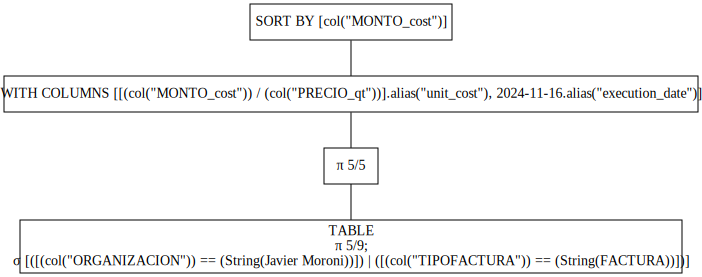

In [53]:
lazy_df.show_graph(optimized=True)

Nuestra función se ha ejecutado sin problemas y nos ha devuelto un otro objeto LazyFrame. Al intentar visualizar este objeto, cómo ya sabemos, nos salta su plan de ejecución no optimizado (NAIVE QUERY PLAN). Podemos visualizar los planes de ejecución (NAIVE QUERY PLAN/OPTIMIZED QUERY PLAN) de nuestro DataFrame a través del método: lazy_nhs_processed_df.show_graph(optimized_graph:bool)

Si comparamos el plan optimizado con el naive podemos notar que la optimizador de queries de Polars ha sido capaz de cambiar el orden de las transformaciones, poniendo la operación de filtrado de la columna "region_name" (FILTER BY) antes de la creación de las nuevas columnas (WITH COLUMNS).

Nota: Para poder visualizar los planos de ejecución puede ser necesario tener instalado graphviz en el sistema (link).

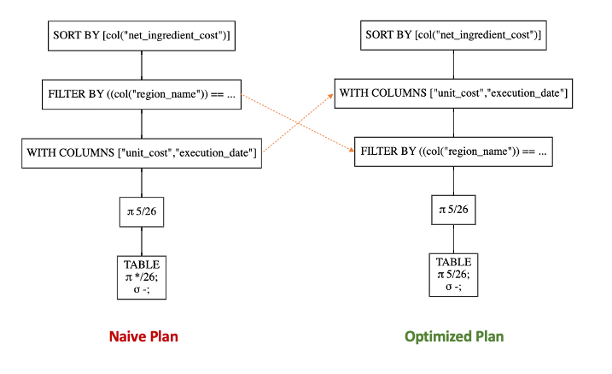

# **collect() y fetch()**
Si en algún momento de nuestro +pipeline+ necesitamos realmente visualizar el pl.LazyDataFrame con sus datos, podemos utilizar métodos como collect() y fetch() que nos van a retornar un pl.DataFrame. El método fetch() es muy indicado para hacer debugging ya que es una operación rápida y que limita el número final de filas devueltas.

In [54]:
# .fetch(): devuelve un número limitado de líneas para hacer debugging
# ==============================================================================
print(type(lazy_df.fetch(20)))
lazy_df.fetch(20)

<class 'polars.dataframe.frame.DataFrame'>


<ipython-input-54-57495d336b2d>:3: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  print(type(lazy_df.fetch(20)))
<ipython-input-54-57495d336b2d>:4: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  lazy_df.fetch(20)


ORG_name,DOC_name,TIP_name,PRECIO_qt,MONTO_cost,unit_cost,execution_date
str,str,str,f64,f64,f64,date
"""Javier Moroni""","""B-0001-00000101""","""Factura""",99586.7769,99586.78,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000094""","""Factura""",63800.905,63800.91,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000098""","""Factura""",60633.4842,60633.48,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000071""","""Factura""",53719.0083,53719.01,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000082""","""Factura""",37190.0826,37190.08,1.0,2024-11-16
…,…,…,…,…,…,…
"""Javier Moroni""","""B-0001-00000075""","""Factura""",13223.1405,13223.14,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000073""","""Factura""",11570.2479,11570.25,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000099""","""Factura""",6300.0,6300.0,1.0,2024-11-16


In [55]:
# .collect(): devuelve todo el DataFrame
# ==============================================================================
print(type(lazy_df.collect()))
lazy_df.collect()

<class 'polars.dataframe.frame.DataFrame'>


ORG_name,DOC_name,TIP_name,PRECIO_qt,MONTO_cost,unit_cost,execution_date
str,str,str,f64,f64,f64,date
"""Javier Moroni""","""B-0001-00000101""","""Factura""",99586.7769,99586.78,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000094""","""Factura""",63800.905,63800.91,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000098""","""Factura""",60633.4842,60633.48,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000071""","""Factura""",53719.0083,53719.01,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000082""","""Factura""",37190.0826,37190.08,1.0,2024-11-16
…,…,…,…,…,…,…
"""Javier Moroni""","""B-0001-00000075""","""Factura""",13223.1405,13223.14,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000073""","""Factura""",11570.2479,11570.25,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000099""","""Factura""",6300.0,6300.0,1.0,2024-11-16


# **Agrupación de Datos - GroupBy**
En esta sección, vamos a explorar un ejemplo sencillo de cómo hacer un GroupBy en Polars. Básicamente, vamos a agrupar nuestros datos preprocesados a nivel del "ORGANIZACION" y calcular la cantidad total de FACTURAS y la media de unidades solicitadas (total_sales y avg_qt).

In [61]:
lazy_df.collect()

ORG_name,DOC_name,TIP_name,PRECIO_qt,MONTO_cost,unit_cost,execution_date
str,str,str,f64,f64,f64,date
"""Javier Moroni""","""B-0001-00000101""","""Factura""",99586.7769,99586.78,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000094""","""Factura""",63800.905,63800.91,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000098""","""Factura""",60633.4842,60633.48,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000071""","""Factura""",53719.0083,53719.01,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000082""","""Factura""",37190.0826,37190.08,1.0,2024-11-16
…,…,…,…,…,…,…
"""Javier Moroni""","""B-0001-00000075""","""Factura""",13223.1405,13223.14,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000073""","""Factura""",11570.2479,11570.25,1.0,2024-11-16
"""Javier Moroni""","""B-0001-00000099""","""Factura""",6300.0,6300.0,1.0,2024-11-16


In [64]:
# Group by Operation
# ==============================================================================
agg_df = (
    lazy_df
    .group_by(["ORG_name"])
    .agg(
        [
            pl.col("MONTO_cost").sum().alias("total_sales"),
            pl.col("PRECIO_qt").mean().alias("avg_qt"),
            # Include execution_date in the aggregation if needed.
            # For example, to get the first execution_date for each group:
            pl.col("execution_date").first().alias("execution_date")
        ]
    )
    .sort("execution_date", descending=True)

).collect()

agg_df

ORG_name,total_sales,avg_qt,execution_date
str,f64,f64,date
"""Javier Moroni""",500097.87,28156.467506,2024-11-16


En este ejemplo hemos utilizado las funciones .sum() y .mean() para agrupar los datos. En este enlace se puede obtener más información sobre otras funciones disponibles: link

# *Conclusiones*
En conclusión, como hemos visto en este artículo de introducción, Polars es una librería capaz de procesar datos tabulares de forma rápida y eficiente, a través de sus características avanzadas como la capacidad de paralelizar tareas y su modo de Lazy Evaluation. También por tener una API amigable, una syntax muy intuitiva y una robusta documentación, se convierte en una excelente opción para procesar datos en Python.